# KAI MENG
# Student ID: 20667206

In [574]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [575]:
# import dataset
df = pd.read_csv('bank-additional.csv', index_col = None, header = 0)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## 1. Data Cleaning and Preprocessing

### Determine the categorial features to drop

In [576]:
CatFeas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
           'contact', 'month', 'day_of_week', 'poutcome']
for feature in CatFeas:
    types = np.unique(df[CatFeas])
    for a in types:
        Y = df.loc[df[feature] == a]
        Y = Y.iloc[:,-1]
        unique, counts = np.unique(Y, return_counts=True)
#        print(dict(zip(unique, counts)))
        if len(unique) == 2:
            print(feature, a)
            print('no/yes ratio:', counts[0]/counts[1])  

job admin.
no/yes ratio: 6.60902255639
job blue-collar
no/yes ratio: 13.4918032787
job entrepreneur
no/yes ratio: 17.5
job housemaid
no/yes ratio: 9.0
job management
no/yes ratio: 9.8
job retired
no/yes ratio: 3.36842105263
job self-employed
no/yes ratio: 11.2307692308
job services
no/yes ratio: 10.2285714286
job student
no/yes ratio: 3.31578947368
job technician
no/yes ratio: 7.6375
job unemployed
no/yes ratio: 4.84210526316
job unknown
no/yes ratio: 8.75
marital divorced
no/yes ratio: 9.37209302326
marital married
no/yes ratio: 8.95634920635
marital single
no/yes ratio: 6.43870967742
marital unknown
no/yes ratio: 10.0
education basic.4y
no/yes ratio: 10.2894736842
education basic.6y
no/yes ratio: 12.4117647059
education basic.9y
no/yes ratio: 12.3488372093
education high.school
no/yes ratio: 8.49484536082
education professional.course
no/yes ratio: 7.23076923077
education university.degree
no/yes ratio: 6.66060606061
education unknown
no/yes ratio: 5.42307692308
default no
no/yes rat

Looking at the output above, which is the no/yes ratio of each type within every categorial variable. We can interpret that there is no big difference among the types within 'marital', 'housing', 'loan', and 'day_of_week', indicating these features can be dropped.

In [577]:
X = X.drop(['marital', 'housing', 'loan', 'day_of_week'], axis = 1)

In [578]:
X.head(5)

,age,job,education,default,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,basic.9y,no,cellular,may,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,high.school,no,telephone,may,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,high.school,no,telephone,jun,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,basic.9y,no,telephone,jun,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,university.degree,no,cellular,nov,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [579]:
list = [1,2,3,4,5,10]
labelencoder = LabelEncoder()
for i in list:
    X.iloc[:,i] = labelencoder.fit_transform(X.iloc[:,i])

In [580]:
X.head(5)

,age,job,education,default,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,1,2,0,0,6,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
1,39,7,3,0,1,6,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0
2,25,7,3,0,1,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38,7,2,0,1,4,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1
4,47,0,6,0,0,7,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8


### Normaliztion

In [581]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [582]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.171429,0.090909,0.285714,0.0,0.0,0.666667,0.133681,0.029412,1.0,0.0,0.5,0.333333,0.269680,0.192469,0.153741,0.512287
1,0.300000,0.636364,0.428571,0.0,1.0,0.666667,0.094977,0.088235,1.0,0.0,0.5,0.937500,0.698753,0.602510,0.956916,0.859735
2,0.100000,0.636364,0.428571,0.0,1.0,0.444444,0.062311,0.000000,1.0,0.0,0.5,1.000000,0.882307,0.376569,0.981179,1.000000
3,0.285714,0.636364,0.285714,0.0,1.0,0.444444,0.004666,0.058824,1.0,0.0,0.5,1.000000,0.882307,0.376569,0.980499,1.000000
4,0.414286,0.000000,0.857143,0.0,0.0,0.777778,0.015921,0.000000,1.0,0.0,0.5,0.687500,0.389322,0.368201,0.806349,0.877883


## 2. Implementing kNN and SVM

### Train test split

In [583]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [584]:
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
4075,0.257143,0.636364,0.428571,0.0,1.0,0.444444,0.066154,0.029412,1.0,0.0,0.5,1.000000,0.882307,0.376569,0.980499,1.000000
3792,0.200000,0.818182,0.714286,0.0,0.0,0.666667,0.026626,0.029412,1.0,0.0,0.5,0.333333,0.269680,0.192469,0.158503,0.512287
4073,0.185714,0.000000,0.857143,0.0,1.0,0.666667,0.098545,0.029412,1.0,0.0,0.5,0.937500,0.698753,0.602510,0.958050,0.859735
532,0.657143,0.909091,0.285714,0.0,0.0,0.888889,0.165797,0.029412,1.0,0.0,0.5,0.479167,0.935308,0.054393,0.073469,0.000000
1465,0.085714,0.818182,0.714286,0.0,0.0,0.444444,0.057919,0.000000,1.0,0.0,0.5,0.104167,0.296960,0.418410,0.142177,0.425709


In [585]:
X_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2900,0.514286,0.181818,0.714286,0.0,0.0,0.777778,0.509196,0.000000,1.0,0.0,0.5,0.6875,0.389322,0.368201,0.797732,0.877883
917,0.142857,0.090909,0.142857,0.0,1.0,0.666667,0.152896,0.000000,1.0,0.0,0.5,0.9375,0.698753,0.602510,0.956916,0.859735
186,0.371429,0.000000,0.428571,0.0,0.0,0.111111,0.030469,0.000000,1.0,0.0,0.5,1.0000,0.484412,0.615063,0.981633,1.000000
1620,0.457143,0.000000,0.857143,0.0,1.0,0.666667,0.005490,0.088235,1.0,0.0,0.5,0.9375,0.698753,0.602510,0.957370,0.859735
1487,0.500000,0.636364,0.428571,0.5,1.0,0.444444,0.020587,0.000000,1.0,0.0,0.5,1.0000,0.882307,0.376569,0.980952,1.000000


### kNN

In [586]:
clf_kNN = KNeighborsClassifier()
clf_kNN.fit(X_train, y_train)
y_pred_kNN = clf_kNN.predict(X_test)
score_kNN = clf_kNN.score(X_test, y_test)
print('accuracy score kNN:', score_kNN)

accuracy score kNN: 0.894822006472


### SVM

In [587]:
clf_SVM = LinearSVC()
clf_SVM.fit(X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_test)
score_SVM = clf_SVM.score(X_test, y_test)
print('accuracy score SVM:', score_SVM)

accuracy score SVM: 0.912621359223


I printed out the classification accuracy score of kNN and SVM as shown above, the accuracy scores are closed, SVM is a little bit better. 

## 3. Model plotting and exploration

### Model plotting for kNN

In [588]:
X_test_matrix = X_test.as_matrix()

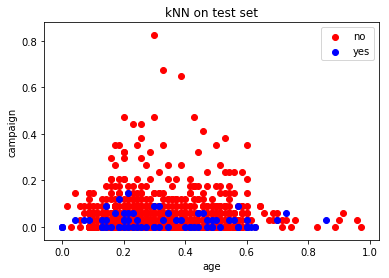

In [589]:
plt.figure()
classLable = ['no', 'yes']
colors = ['red','blue']
for color, i, class_name in zip(colors, ['no', 'yes'], classLable):
    plt.scatter(X_test_matrix[y_pred_kNN == i, 0], X_test_matrix[y_pred_kNN == i, 7], color = color, label = class_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('kNN on test set')
plt.xlabel('age')
plt.ylabel('campaign')
plt.show()

Looking at the plot above, the horizontal axis represents age(post_normalization), and the vertical axis represents the variable named campaign(post-normalization), which is the number of contacts performed during this campaign and for this client. It obviously shows that as the number of contacts performed goes up, clients are more likely not to choose subscribing term deposit, and this pattern is common across all ages. 

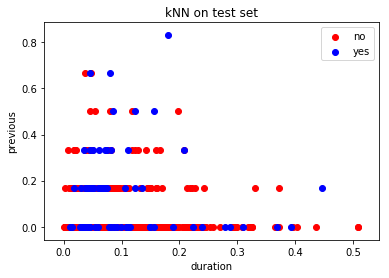

In [590]:
plt.figure()
classLable = ['no', 'yes']
colors = ['red','blue']
for color, i, class_name in zip(colors, ['no', 'yes'], classLable):
    plt.scatter(X_test_matrix[y_pred_kNN == i, 6], X_test_matrix[y_pred_kNN == i, 9], color = color, label = class_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('kNN on test set')
plt.xlabel('duration')
plt.ylabel('previous')
plt.show()

In this plot, the two dimensions are horizontal - duration(last contact duration, in seconds) and vertical - previous(number of contacts performed before this campaign and for this client). We could interpret that whether the contacting duration is long or not, it does not seem to make a big difference. Also, according to the test set, there are not so many clients being contacted for many times previously.

### Model plotting for SVM

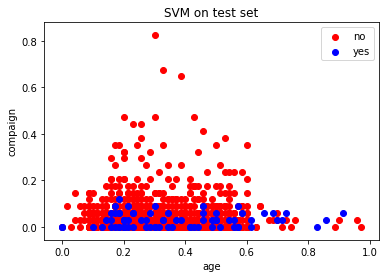

In [591]:
plt.figure()
classLable = ['no', 'yes']
colors = ['red','blue']
for color, i, class_name in zip(colors, ['no', 'yes'], classLable):
    plt.scatter(X_test_matrix[y_pred_SVM == i, 0], X_test_matrix[y_pred_SVM == i, 7], color = color, label = class_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('SVM on test set')
plt.xlabel('age')
plt.ylabel('compaign')
plt.show()

Plotting the test data based on 'age' and 'compaign' under SVM model, the outlook is pretty similar with the one under kNN. If the compaign variable is pretty high, which is the number of contacts during this campaign, clients tend not to subscribe term deposit.

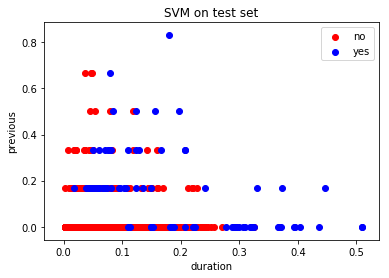

In [592]:
plt.figure()
classLable = ['no', 'yes']
colors = ['red','blue']
for color, i, class_name in zip(colors, ['no', 'yes'], classLable):
    plt.scatter(X_test_matrix[y_pred_SVM == i, 6], X_test_matrix[y_pred_SVM == i, 9], color = color, label = class_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('SVM on test set')
plt.xlabel('duration')
plt.ylabel('previous')
plt.show()

In this plot, the two dimensions are horizontal - duration(last contact duration, in seconds) and vertical - previous(number of contacts performed before this campaign and for this client). Unlike the plot with same dimensions under kNN model, we could interpret that if the contacting duration is long, clients are more likely to subscribe term deposit according to the prediction of this SVM model. Meanwhile, if the number of contacts made before this campaign with the client is low, the client is less likely to subscribe term deposit.